In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [29]:
df.shape

(41188, 21)

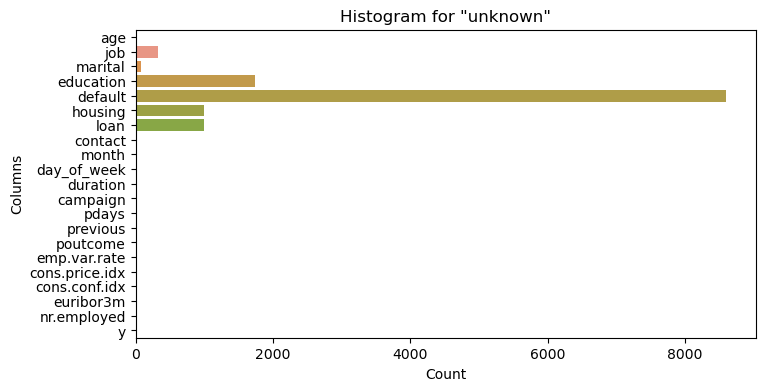

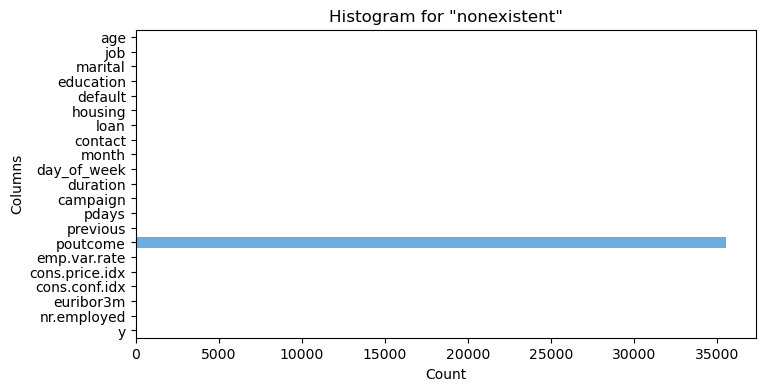

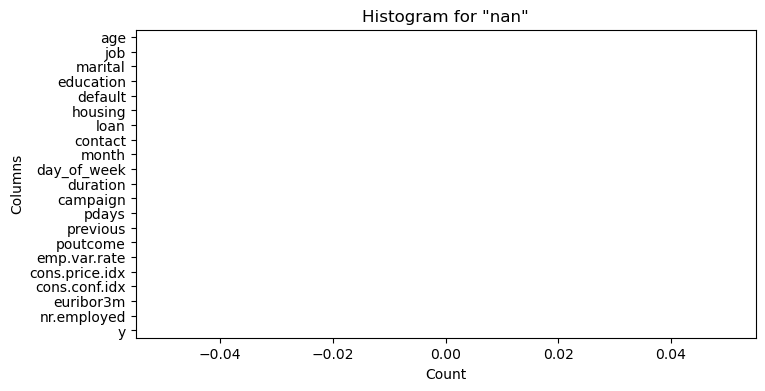

In [30]:
search_values = ['unknown', 'nonexistent', np.nan]

# Create subplots for each search value
for value in search_values:
    plt.figure(figsize=(8, 4))
    plt.title(f'Histogram for "{value}"')
    
    # Initialize a count for each column
    counts = []
    
    # Iterate through columns
    for column in df.columns:
        # Count occurrences of the value in the column
        count = df[column].apply(lambda x: x == value).sum()
        counts.append(count)
    
    # Create a bar plot for the counts
    sns.barplot(x=counts, y=df.columns)
    plt.xlabel('Count')
    plt.ylabel('Columns')

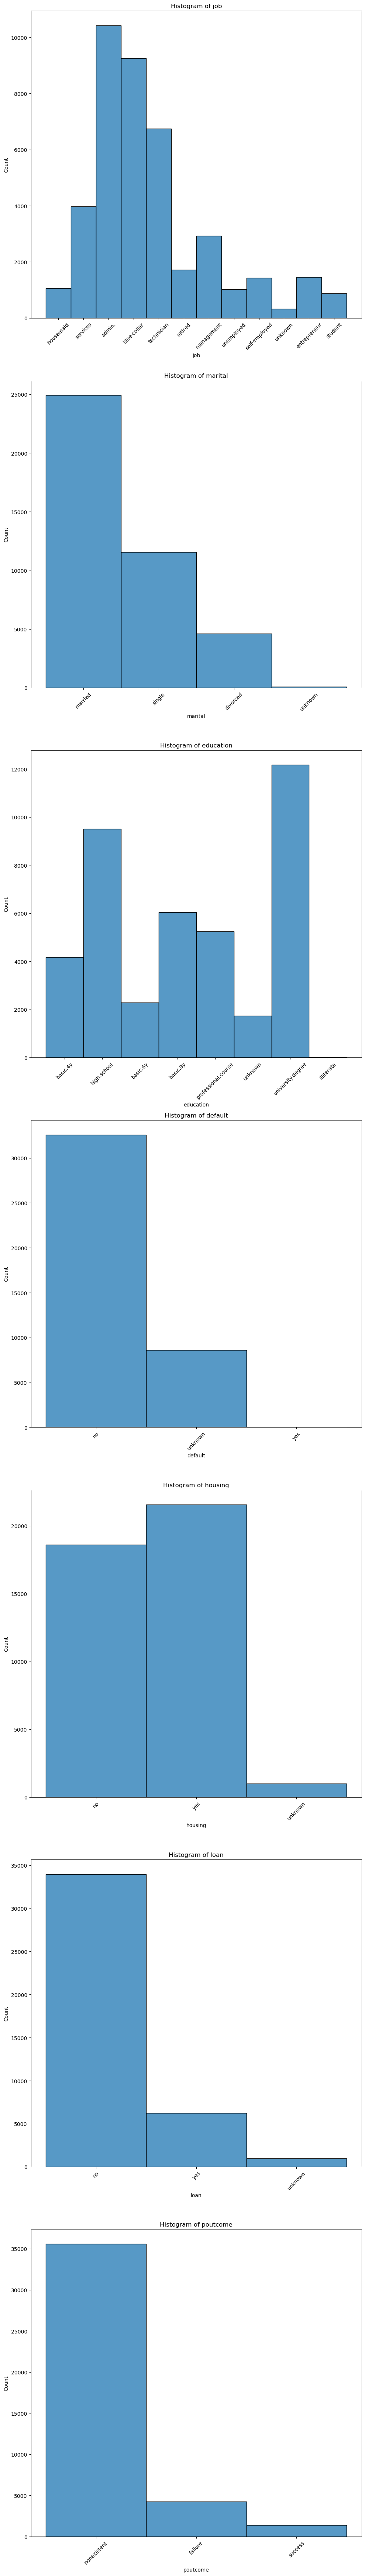

In [31]:
# Define the columns you want to plot
columns_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 10 * len(columns_to_plot)))

# Loop through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

    # Rotate the x-axis labels
    axes[i].tick_params(axis='x', labelrotation=45)  # You can adjust the rotation angle as needed

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [73]:
value_counts_desc = df.stack().value_counts().sort_values(ascending=False)
value_counts_desc.head(10)

no             121708
999             39675
0               35582
nonexistent     35563
yes             32467
cellular        26144
married         24928
1               22250
1.4             16247
5228.1          16234
dtype: int64

In [74]:
condition = (df['pdays'] == 999) & (df['poutcome'] == 'failure')

df.loc[condition, 'poutcome'] = 'nonexistent'

In [75]:
df['poutcome'].value_counts()

nonexistent    39673
success         1373
failure          142
Name: poutcome, dtype: int64

In [76]:
df.replace('unknown', np.nan, inplace=True)
df.replace('nonexistent', np.nan, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [77]:
df.isna().sum().sum()

52391

In [78]:
from sklearn.preprocessing import LabelEncoder

# Specify the columns you want to label encode
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [88]:
def random_forest_impute(df, columns_to_impute):
    df_subset = df[columns_to_impute]
    rf_estimator = ExtraTreesRegressor(n_estimators=10, random_state=0)
    rf_imputer = IterativeImputer(estimator=rf_estimator, random_state=0)
    df_imputed = pd.DataFrame(rf_imputer.fit_transform(df_subset), columns=columns_to_impute)
    df[columns_to_impute] = df_imputed
    return df

def knn_impute(df, columns_to_impute):
    df_subset = df[columns_to_impute]
    knn_imputer = KNNImputer(n_neighbors=5)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_subset), columns=columns_to_impute)
    df[columns_to_impute] = df_imputed
    return df

def mode_impute(df, columns_to_impute):
    for col in columns_to_impute:
        mode = df[col].mode()[0]
        df[col].fillna(mode, inplace=True)
    return df

In [89]:
# Assuming you have your DataFrame 'df' and a list of columns to impute 'columns_to_impute'
columns_to_impute = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Make a copy of the original DataFrame to preserve the original data
df_rf = df.copy()
df_knn = df.copy()
df_mode = df.copy()

# Apply the imputers to different DataFrame copies
df_rf = random_forest_impute(df_rf, columns_to_impute)
df_knn = knn_impute(df_knn, columns_to_impute)
df_mode = mode_impute(df_mode, columns_to_impute)

In [93]:
df_rf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,2.0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7.0,1.0,3.0,2.0,0.0,0.0,telephone,may,mon,...,1,999,0,2.0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7.0,1.0,3.0,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,2.0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.0,1.0,1.0,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,2.0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7.0,1.0,3.0,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,2.0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,1.0,0.0,cellular,nov,fri,...,1,999,0,2.0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,cellular,nov,fri,...,1,999,0,2.0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5.0,1.0,6.0,0.0,1.0,0.0,cellular,nov,fri,...,2,999,0,2.0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,cellular,nov,fri,...,1,999,0,2.0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [94]:
# Split each imputed dataframe into train and test sets
X_rf = df_rf.drop(['y', 'duration', 'contact', 'month', 'day_of_week'], axis=1)  # Replace 'y' and 'duration' with your target and feature column names
y_rf = df_rf['y']

X_knn = df_knn.drop(['y', 'duration', 'contact', 'month', 'day_of_week'], axis=1)
y_knn = df_knn['y']

X_mode = df_mode.drop(['y', 'duration', 'contact', 'month', 'day_of_week'], axis=1)
y_mode = df_mode['y']


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)
X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
nb_model = GaussianNB()

# Fit and evaluate on the random forest imputed dataframe
nb_model.fit(X_train_rf, y_train_rf)
nb_accuracy_rf = nb_model.score(X_test_rf, y_test_rf)
print(f'Gaussian Naive Bayes Accuracy on the random forest imputed test set: {nb_accuracy_rf * 100:.2f}%')

# Fit and evaluate on the KNN imputed dataframe
nb_model.fit(X_train_knn, y_train_knn)
nb_accuracy_knn = nb_model.score(X_test_knn, y_test_knn)
print(f'Gaussian Naive Bayes Accuracy on the KNN imputed test set: {nb_accuracy_knn * 100:.2f}%')

# Fit and evaluate on the mode imputed dataframe
nb_model.fit(X_train_mode, y_train_mode)
nb_accuracy_mode = nb_model.score(X_test_mode, y_test_mode)
print(f'Gaussian Naive Bayes Accuracy on the mode imputed test set: {nb_accuracy_mode * 100:.2f}%')

# Support Vector Machine (SVM)
svm_model = SVC()

# Fit and evaluate on the random forest imputed dataframe
svm_model.fit(X_train_rf, y_train_rf)
svm_accuracy_rf = svm_model.score(X_test_rf, y_test_rf)
print(f'SVM Accuracy on the random forest imputed test set: {svm_accuracy_rf * 100:.2f}%')

# Fit and evaluate on the KNN imputed dataframe
svm_model.fit(X_train_knn, y_train_knn)
svm_accuracy_knn = svm_model.score(X_test_knn, y_test_knn)
print(f'SVM Accuracy on the KNN imputed test set: {svm_accuracy_knn * 100:.2f}%')

# Fit and evaluate on the mode imputed dataframe
svm_model.fit(X_train_mode, y_train_mode)
svm_accuracy_mode = svm_model.score(X_test_mode, y_test_mode)
print(f'SVM Accuracy on the mode imputed test set: {svm_accuracy_mode * 100:.2f}%')

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit and evaluate on the random forest imputed dataframe
rf_model.fit(X_train_rf, y_train_rf)
rf_accuracy_rf = rf_model.score(X_test_rf, y_test_rf)
print(f'Random Forest Accuracy on the random forest imputed test set: {rf_accuracy_rf * 100:.2f}%')

# Fit and evaluate on the KNN imputed dataframe
rf_model.fit(X_train_knn, y_train_knn)
rf_accuracy_knn = rf_model.score(X_test_knn, y_test_knn)
print(f'Random Forest Accuracy on the KNN imputed test set: {rf_accuracy_knn * 100:.2f}%')

# Fit and evaluate on the mode imputed dataframe
rf_model.fit(X_train_mode, y_train_mode)
rf_accuracy_mode = rf_model.score(X_test_mode, y_test_mode)
print(f'Random Forest Accuracy on the mode imputed test set: {rf_accuracy_mode * 100:.2f}%')

Gaussian Naive Bayes Accuracy on the random forest imputed test set: 86.00%
Gaussian Naive Bayes Accuracy on the KNN imputed test set: 86.00%
Gaussian Naive Bayes Accuracy on the mode imputed test set: 86.00%
SVM Accuracy on the random forest imputed test set: 89.48%
SVM Accuracy on the KNN imputed test set: 89.48%
SVM Accuracy on the mode imputed test set: 89.48%
Random Forest Accuracy on the random forest imputed test set: 88.95%
Random Forest Accuracy on the KNN imputed test set: 88.95%
Random Forest Accuracy on the mode imputed test set: 88.95%
